In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import seaborn as sns
import scipy as sp
plt.style.use('notestyle')

In [2]:
def f(x):
    return np.sin(2*np.pi*x)

In [3]:
ngrid=101
xg = np.linspace(0,1,num=ngrid)

In [4]:
def basisf(j,x):
    return x**j

In [5]:
def fitf(x):
    return sum([w[j]*basisf(j,x) for j in range(M)])

In [6]:
def initwithoutnoise():
    global N
    global xp
    global tp
    N = 10
    np.random.seed(seed=54)
    xp = np.sort(np.random.random_sample(N))
    tp = f(xp)

In [7]:
initwithoutnoise()
print(tabulate(zip(range(N),xp)))

-  ----------
0  0.00860545
1  0.029657
2  0.184877
3  0.363239
4  0.420183
5  0.518283
6  0.671484
7  0.757312
8  0.801381
9  0.968936
-  ----------


In [8]:
def initwithnoise():
    global N
    global xp
    global tp
    global sigma
    N = 10
    np.random.seed(seed=54)
    xp = np.sort(np.random.random_sample(N))
    np.random.seed(seed=58)
    sigma = 0.1
    tp = f(xp) + np.random.normal(0,sigma,N)

In [9]:
initwithnoise()
print(tabulate(zip(xp,tp)))

----------  ----------
0.00860545  -0.0219753
0.029657    -0.0248944
0.184877     0.836471
0.363239     0.756628
0.420183     0.31031
0.518283    -0.0564809
0.671484    -0.977676
0.757312    -1.14703
0.801381    -1.00067
0.968936    -0.0672362
----------  ----------


<IPython.core.display.Javascript object>


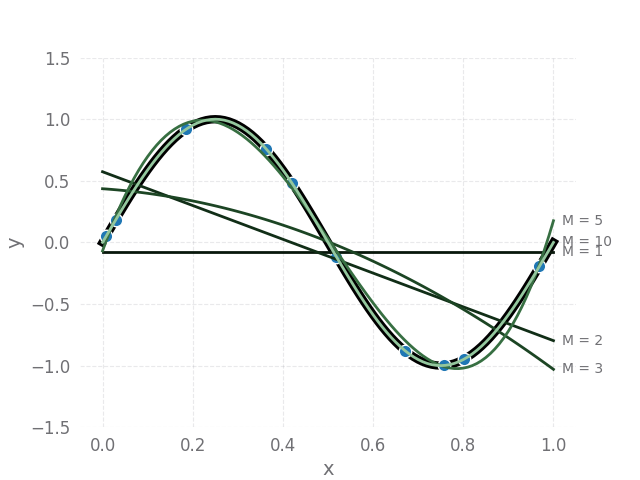

(-1.5, 1.5)

In [10]:
initwithoutnoise()
cmap = sns.cubehelix_palette(N+1, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.figure()
plt.plot(xg, f(xg),color=cmap[0],lw=6)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')
Mmax = N
for M in [1,2, 3,5,10]: #range(1,Mmax+1):
    def basisf(j,x):
        return x**j

    def fitf(x):
        return sum([w[j]*basisf(j,x) for j in range(M)])

    phi = np.zeros((N,M))
    for n, x in enumerate(xp):
        for j in range(M):
            phi[n,j] = basisf(j,x)

#    omega = np.linalg.inv(phi.transpose() @ phi)

#    w = np.dot(omega, np.dot(phi.transpose(),tp))
    phit = phi.transpose()
    w = np.linalg.solve(np.dot(phit,phi), np.dot(phit,tp))
    plt.plot(xg, fitf(xg), color=cmap[M], lw=2)
#   plt.plot(xg, fitf(xg), lw=2)
    plt.text(1.02,min(max(fitf(1),-1.5),1.5),f'M = {M}',va='center')
plt.ylim(-1.5,1.5)
#plt.savefig('poly.pdf')

<IPython.core.display.Javascript object>


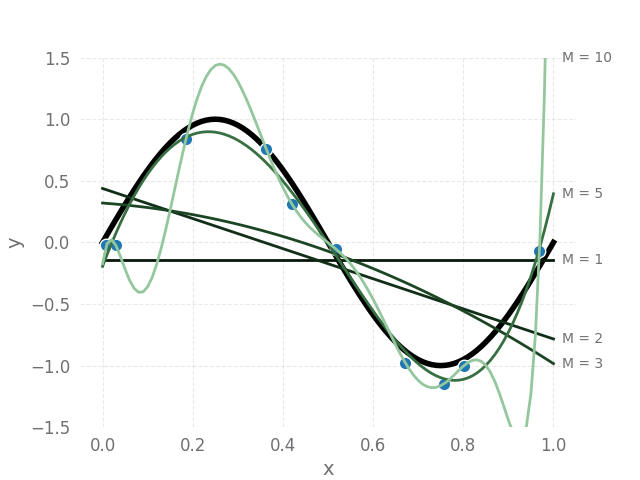

(-1.5, 1.5)

In [11]:
initwithnoise()
cmap = sns.cubehelix_palette(N+1, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.figure()
plt.plot(xg, f(xg),color=cmap[0],lw=4)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')
Mmax = N
for M in [1,2, 3,5,10]: #range(1,Mmax+1):
    def basisf(j,x):
        return x**j

    def fitf(x):
        return sum([w[j]*basisf(j,x) for j in range(M)])

    phi = np.zeros((N,M))
    for n, x in enumerate(xp):
        for j in range(M):
            phi[n,j] = basisf(j,x)

#    omega = np.linalg.inv(phi.transpose() @ phi)

#    w = np.dot(omega, np.dot(phi.transpose(),tp))
    phit = phi.transpose()
    w = np.linalg.solve(np.dot(phit,phi), np.dot(phit,tp))    
    plt.plot(xg, fitf(xg), color=cmap[M], lw=2)
#   plt.plot(xg, fitf(xg), lw=2)
    plt.text(1.02,min(max(fitf(1),-1.5),1.5),f'M = {M}',va='center')
plt.ylim(-1.5,1.5)
#plt.savefig('poly_noise.pdf')

In [12]:
w

array([-1.71847694e-01,  2.50627690e+01, -9.90767277e+02,  1.24604071e+04,
       -7.06378300e+04,  2.16323027e+05, -3.83987112e+05,  3.95743626e+05,
       -2.19881507e+05,  5.09505279e+04])

In [13]:
w[-1]*9*8*7*6*5*4*3*2

18488927579.016872

### Regularization

<IPython.core.display.Javascript object>


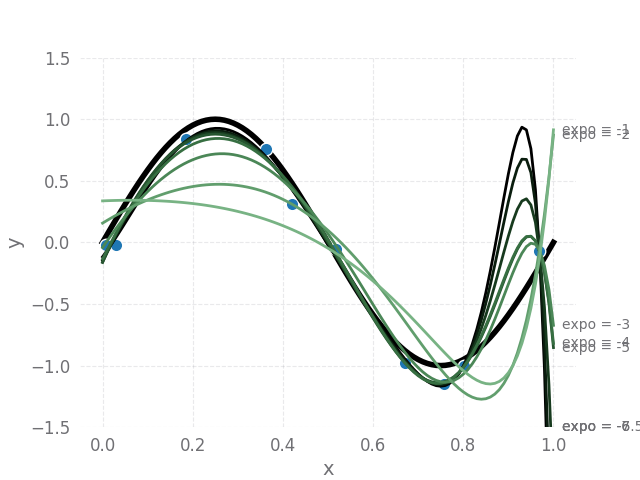

In [14]:
initwithnoise()
M = 2*N
expos = [-7,-6.5,-6,-5,-4,-3,-2,-1]

cmap = sns.cubehelix_palette(len(expos)+1, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.figure()
plt.plot(xg, f(xg),color=cmap[0],lw=4)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')

quali = []

for i,expo in enumerate(expos):
    lamb = 10**expo
    def basisf(j,x):
        return x**j

    def fitf(x):
        return sum([w[j]*basisf(j,x) for j in range(M)])

    phi = np.zeros((N,M))
    for n, x in enumerate(xp):
        for j in range(M):
            phi[n,j] = basisf(j,x)

    omegatilde = np.linalg.inv(phi.transpose() @ phi + lamb*np.identity(M))

    w = np.dot(omegatilde, np.dot(phi.transpose(),tp))
    quali.append(sum((fitf(xg)-f(xg))**2)/len(xg))
    plt.plot(xg, fitf(xg), color=cmap[i], lw=2)
#   plt.plot(xg, fitf(xg), lw=2)
    plt.text(1.02,min(max(fitf(1),-1.5),1.5),f'expo = {expo}',va='center')
    plt.ylim(-1.5,1.5)

In [15]:
quali

[0.35446482692589665,
 0.22923608166926787,
 0.10034720587909784,
 0.029015264113306936,
 0.031179292365359632,
 0.033145764139097526,
 0.11193790677055024,
 0.16517764373706723]

<IPython.core.display.Javascript object>


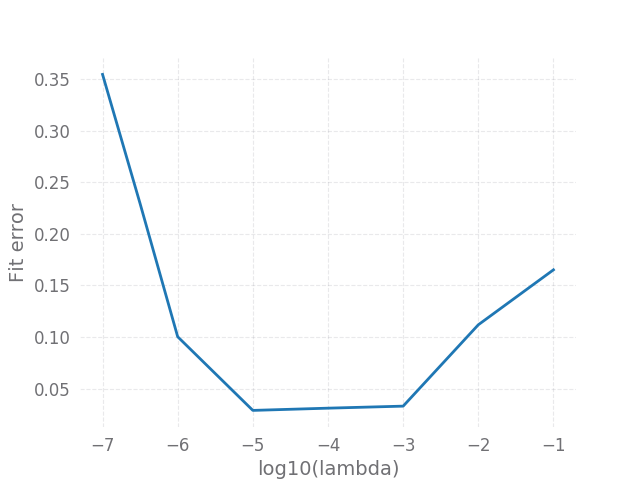

In [16]:
plt.figure()
plt.xlabel('log10(lambda)')
plt.ylabel('Fit error')
plt.plot(expos,quali)
#plt.savefig('regul.pdf')

### Probability distributions - plotting an ensemble

<IPython.core.display.Javascript object>


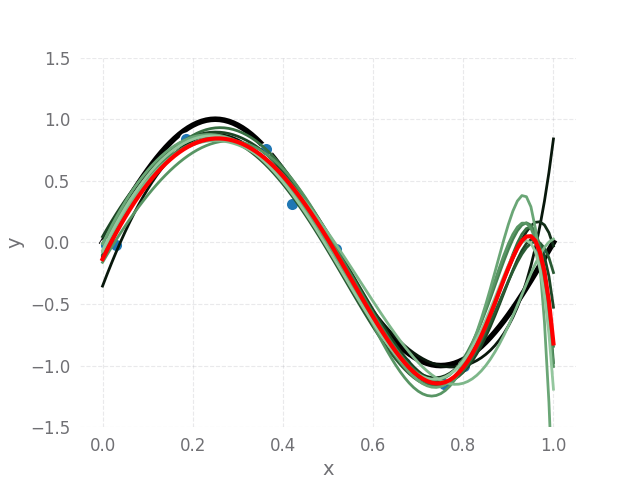

(-1.5, 1.5)

In [17]:
initwithnoise()
M = 2*N
expo = -4
lamb = 10**expo
Nens = 10

plt.figure()
cmap = sns.cubehelix_palette(Nens+1, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.plot(xg, f(xg),color=cmap[0],lw=4)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')

quali = []

def basisf(j,x):
    return x**j

def fitf(x):
    return sum([w[j]*basisf(j,x) for j in range(M)])

phi = np.zeros((N,M))
for n, x in enumerate(xp):
    for j in range(M):
        phi[n,j] = basisf(j,x)

phit = phi.transpose()

omegatilde = np.linalg.inv(phi.transpose() @ phi + lamb*np.identity(M))

w0 = np.dot(omegatilde, np.dot(phi.transpose(),tp))

w=w0

omega = sigma**2*omegatilde

for i in range(Nens):
    w=np.random.multivariate_normal(w0,omega)
    plt.plot(xg, fitf(xg), color = cmap[i+1],lw=2)
w=w0
plt.plot(xg, fitf(xg), color='r', lw=3)
#    plt.text(1.02,min(max(fitf(1),-1.5),1.5),f'expo = {expo}',va='center')
plt.ylim(-1.5,1.5)
#plt.savefig('ensemble.pdf')

### Plotting the error bar

<IPython.core.display.Javascript object>


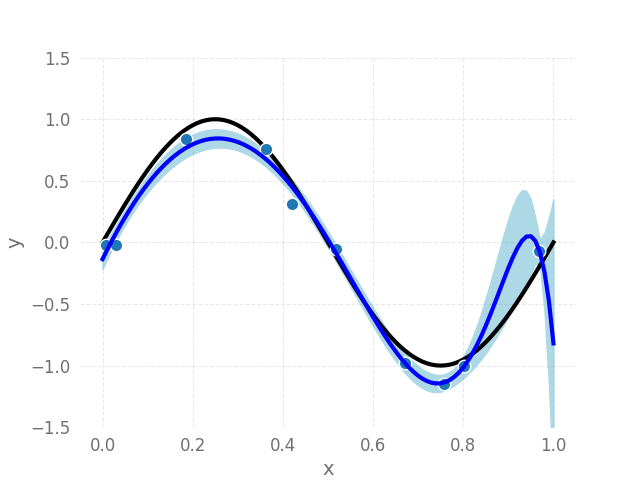

(-1.5, 1.5)

In [18]:
initwithnoise()
M = 2*N
expo = -4
lamb = 10**expo

plt.figure()
cmap = sns.cubehelix_palette(Nens+1, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.plot(xg, f(xg),color=cmap[0],lw=3)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')

delomeg = np.identity(M)

quali = []

def basisf(j,x):
    return x**j

def fitf(x):
    return sum([w[j]*basisf(j,x) for j in range(M)])

phi = np.zeros((N,M))
for n, x in enumerate(xp):
    for j in range(M):
        phi[n,j] = basisf(j,x)

omegatilde = np.linalg.inv(phi.transpose() @ phi + lamb*np.identity(M))
omega = sigma**2*omegatilde

w0 = np.dot(omegatilde, np.dot(phi.transpose(),tp))

width =[]

for x in xg:
    phivec = np.asarray([basisf(j,x) for j in range(M)])
    width.append(np.sqrt(np.dot(np.dot(phivec,omega),phivec)))

width = np.asarray(width)

w=w0
plt.plot(xg, fitf(xg), color='b', lw=3)
plt.fill_between(xg, fitf(xg)-width, fitf(xg)+width, color='lightblue')

plt.ylim(-1.5,1.5)
#plt.savefig('errorbar.pdf')

### The prior distribution

<IPython.core.display.Javascript object>


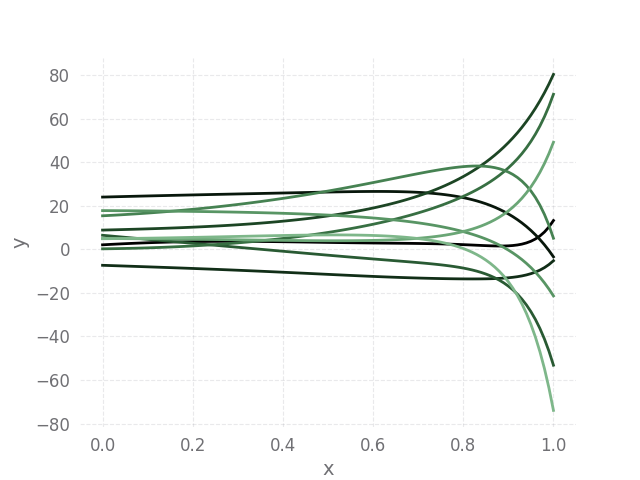

In [19]:
initwithnoise()
M = 2*N
expo = -4
lamb = 10**expo
Nens = 10

lambtilde = lamb/sigma**2

plt.figure()
cmap = sns.cubehelix_palette(Nens+1, start=2, rot=0, dark=0, light=.7, reverse=True)
#plt.plot(xg, f(xg),color=cmap[0],lw=4)
#plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')

quali = []

def basisf(j,x):
    return x**j

def fitf(x):
    return sum([w[j]*basisf(j,x) for j in range(M)])

phi = np.zeros((N,M))
for n, x in enumerate(xp):
    for j in range(M):
        phi[n,j] = basisf(j,x)

phit = phi.transpose()
np.random.seed(seed=53)
for i in range(Nens):
    w=np.random.multivariate_normal(np.zeros(M),np.identity(M)/lambtilde)
    plt.plot(xg, fitf(xg), color=cmap[i], lw=2)
#    plt.text(1.02,min(max(fitf(1),-1.5),1.5),f'expo = {expo}',va='center')
#plt.ylim(-1.5,1.5)
#plt.savefig('prior_ensemble.pdf')

### Kernel regression

#### Kernel regression without noise

<IPython.core.display.Javascript object>


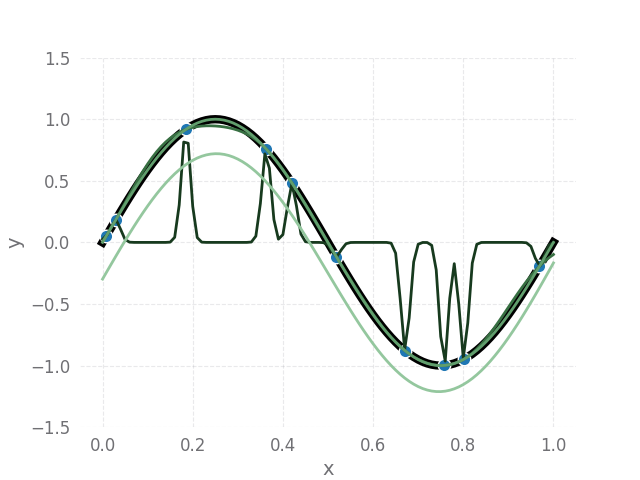

In [20]:
initwithoutnoise()

plt.figure()
cmap = sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.plot(xg, f(xg),color=cmap[0],lw=6)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')

for i,ll in enumerate([0.01,.1,0.5,1]):
    def kernel(x1,x2):
        return np.exp(-(x1-x2)**2/(2*ll**2))
    
    G=np.asarray([[kernel(x1,x2) for x2 in xp] for x1 in xp])
    Ginv = np.linalg.inv(G)

    def fitf(x):
        return np.sum([kernel(x,xx)*a[i] for i,xx in enumerate(xp)])

    a = np.dot(Ginv,tp)

    fitg = [fitf(x) for x in xg]
    plt.plot(xg,fitg,color = cmap[i+1])
    plt.ylim(-1.5,1.5)
#plt.savefig('kernel_regression_without_noise.pdf')

#### Kernel regression with noise

<IPython.core.display.Javascript object>


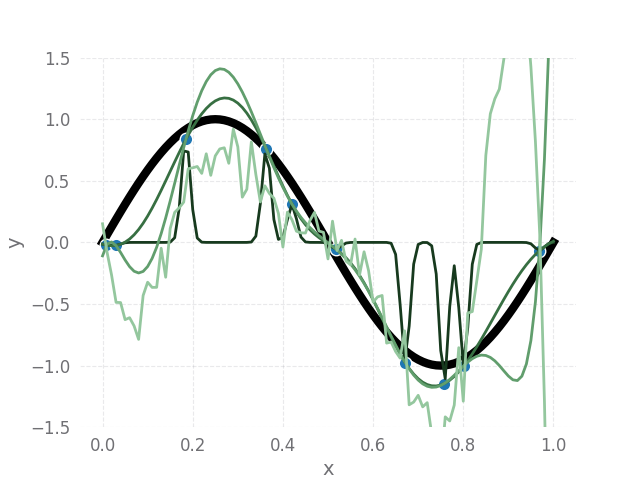

In [21]:
initwithnoise()
plt.figure()
cmap = sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.plot(xg, f(xg),color=cmap[0],lw=6)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')


for i,ll in enumerate([0.01,.1,0.5,1]):
    def kernel(x1,x2):
        return np.exp(-(x1-x2)**2/(2*ll**2))
    
    G=np.asarray([[kernel(x1,x2) for x2 in xp] for x1 in xp])
    Ginv = np.linalg.inv(G)

    def fitf(x):
        return np.sum([kernel(x,xx)*a[i] for i,xx in enumerate(xp)])

    a = np.dot(Ginv,tp)

    fitg = [fitf(x) for x in xg]
    plt.plot(xg,fitg,color = cmap[i+1])
    plt.ylim(-1.5,1.5)
#plt.savefig('kernel_regression_with_noise.pdf')

### Kernel ridge regression

<IPython.core.display.Javascript object>


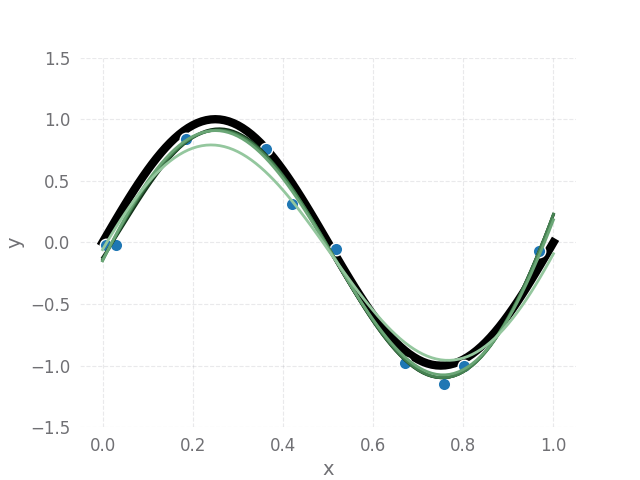

In [22]:
initwithnoise()
plt.figure()
cmap = sns.cubehelix_palette(6, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.plot(xg, f(xg),color=cmap[0],lw=6)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')

quali = []

ll = 0.5

expos = [-6,-5,-4,-3,-2]
for i,expo in enumerate(expos):
    lprime = 10**expo
    def kernel(x1,x2):
        return np.exp(-(x1-x2)**2/(2*ll**2))
    
    G=np.asarray([[kernel(x1,x2) for x2 in xp] for x1 in xp])
    Ginv = np.linalg.inv(G+lprime*np.identity(N))

    def fitf(x):
        return np.sum([kernel(x,xx)*a[i] for i,xx in enumerate(xp)])

    a = np.dot(Ginv,tp)

    fitg = [fitf(x) for x in xg]
    plt.plot(xg,fitg,color = cmap[i+1])
    plt.ylim(-1.5,1.5)
    quali.append(sum((fitf(xg)-f(xg))**2)/len(xg))

#plt.savefig('kernel_ridge_regression_with_noise.pdf')

<IPython.core.display.Javascript object>


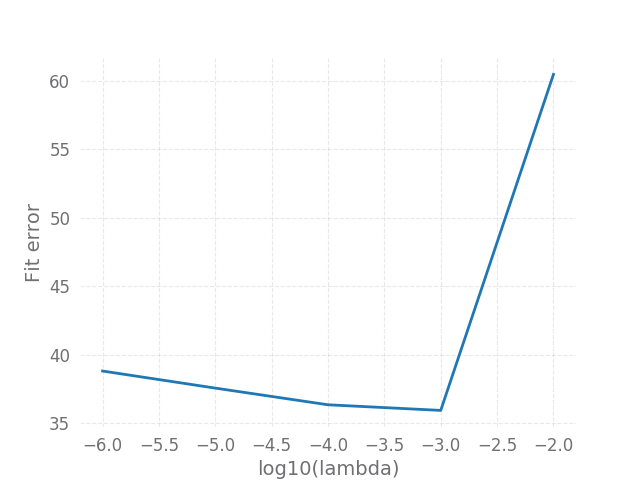

In [23]:
plt.figure()
plt.xlabel('log10(lambda)')
plt.ylabel('Fit error')
plt.plot(expos,quali)
#plt.savefig('kernel_regul.pdf')

<IPython.core.display.Javascript object>


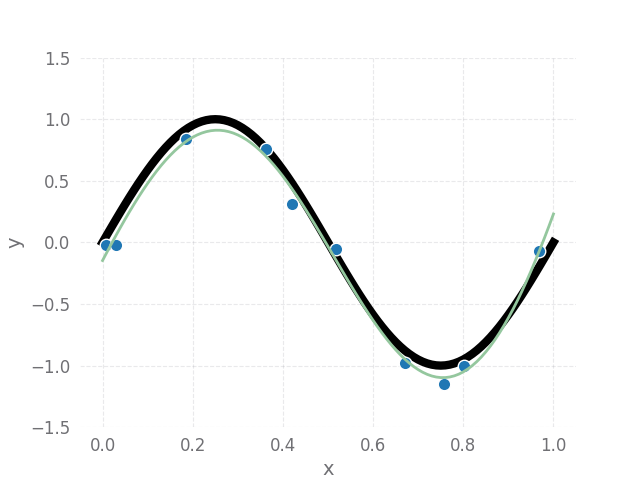

(-1.5, 1.5)

In [24]:
initwithnoise()

plt.figure()
cmap = sns.cubehelix_palette(2, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.plot(xg, f(xg),color=cmap[0],lw=6)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')

ll = 0.5

expo = -4
lprime = 10**expo
def kernel(x1,x2):
    return np.exp(-(x1-x2)**2/(2*ll**2))

G=np.asarray([[kernel(x1,x2) for x2 in xp] for x1 in xp])
Ginv = np.linalg.inv(G+lprime*np.identity(N))

def fitf(x):
    return np.sum([kernel(x,xx)*a[i] for i,xx in enumerate(xp)])

a = np.dot(Ginv,tp)

fitg = [fitf(x) for x in xg]
plt.plot(xg,fitg,color = cmap[1])
plt.ylim(-1.5,1.5)

#plt.savefig('kernel_best_fit.pdf')

### Gaussian process

#### Prior distribution with Gaussian kernel

<IPython.core.display.Javascript object>


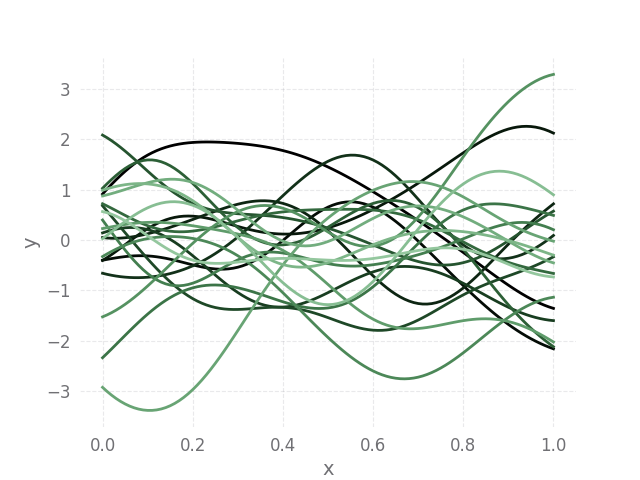

<IPython.core.display.Javascript object>


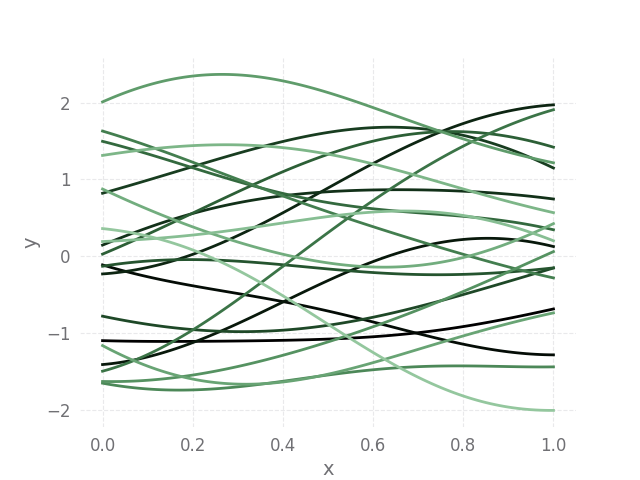

In [25]:
initwithoutnoise()

def kernel(x,xp):
    return np.exp(-(x-xp)**2/(2*ll**2))


for ll in [0.2,0.6]:
    funcnum = 20
    cmap = sns.cubehelix_palette(funcnum, start=2, rot=0, dark=0, light=.7, reverse=True)
    plt.figure()
    plt.xlabel('x')
    plt.ylabel('y')
    kk = np.array([[kernel(x,xp) for x in xg] for xp in xg ])
    yy = np.random.multivariate_normal(np.zeros(ngrid),kk,funcnum)
    for i,y in enumerate(yy):
        plt.plot(xg,y,color = cmap[i])
    fname = 'prior_l_'+str(ll).replace('.','_')+'.pdf'
    #plt.savefig(fname)

### Gaussian process

<IPython.core.display.Javascript object>


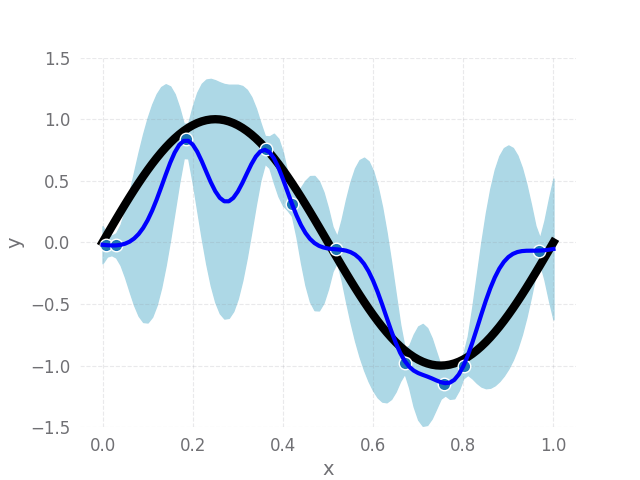

<IPython.core.display.Javascript object>


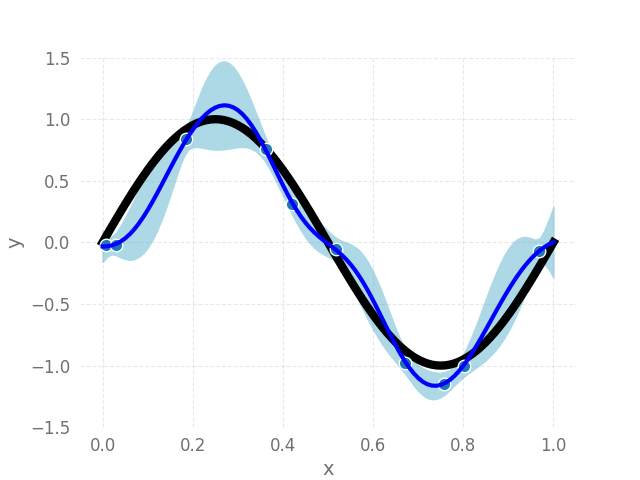

<IPython.core.display.Javascript object>


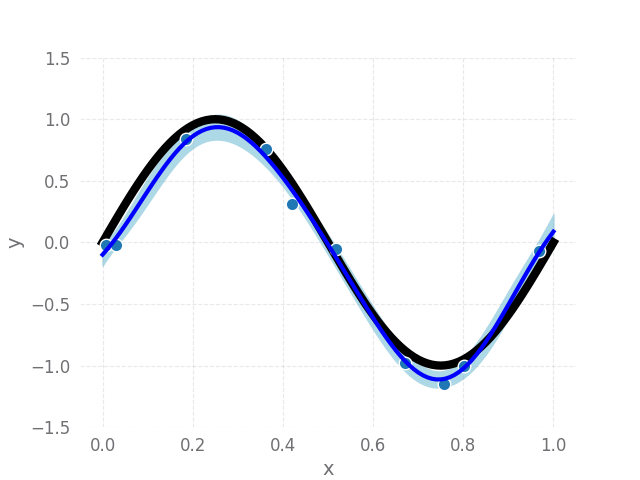

<IPython.core.display.Javascript object>


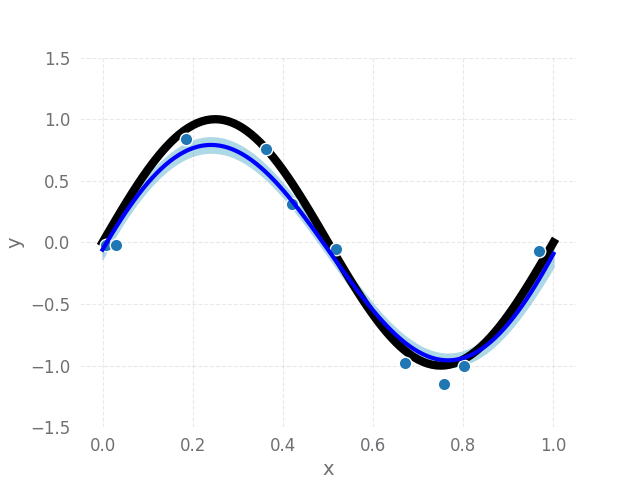

In [26]:
initwithnoise()

def kernel(x,xpp):
    return k0*np.exp(-(x-xpp)**2/(2*ll**2))

def fitf(x):
    kv = np.array([kernel(x,xpp) for xpp in xp])
    return np.dot(kv,kkvec)

def varx(x):
    kv = np.array([kernel(x,xpp) for xpp in xp])
    return kernel(x,x)- np.dot(kv,np.dot(Cinv,kv))

k0 = 1
for ll in [0.05,0.1,0.2,0.5]:
    plt.figure()
    cmap = sns.cubehelix_palette(2, start=2, rot=0, dark=0, light=.7, reverse=True)
    plt.plot(xg, f(xg),color=cmap[0],lw=6)
    plt.plot(xp,tp,'o')
    plt.xlabel('x')
    plt.ylabel('y')


    K = np.array([[kernel(x,xpp) for x in xp] for xpp in xp])
    C = K + sigma**2*np.identity(N)
    Cinv = np.linalg.inv(C)
    kkvec = np.linalg.solve(C,tp)


    fitg = np.array([fitf(x) for x in xg])
    width = np.array([np.sqrt(varx(x)) for x in xg])
    plt.ylim(-1.5,1.5)

    plt.plot(xg, fitg, color='b', lw=3)
    plt.fill_between(xg, fitg-width, fitg+width, color='lightblue')
    fname = 'gp_'+str(ll).replace('.','_')+'.pdf'
    #plt.savefig(fname)

<IPython.core.display.Javascript object>


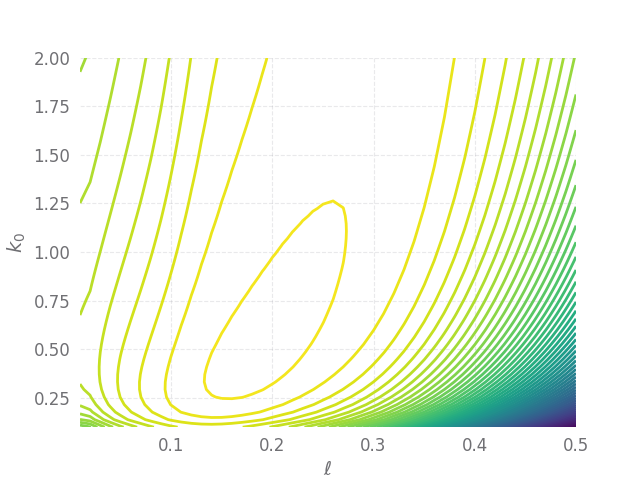

In [27]:
initwithnoise()

# Theta = (ll,k0)
def logP(theta):
    K = np.array([[theta[1]*np.exp(-(x-xpp)**2/(2*theta[0]**2))for x in xp] for xpp in xp])
    C = K + sigma**2*np.identity(N)
    Cinvtp =np.linalg.solve(C,tp)
    return -np.log(np.linalg.det(C))-np.dot(tp,Cinvtp)

llist = np.linspace(0.01,0.5,50)
k0list = np.linspace(0.1,2,50)

zz = [[logP([ll,k0]) for ll in llist] for k0 in k0list]

xlist,ylist = np.meshgrid(llist,k0list)

plt.figure()
plt.xlabel('$\ell$')
plt.ylabel('$k_0$')
plt.contour(xlist,ylist,zz,60)
#plt.savefig('logP.pdf')

In [28]:
def mlogP(theta):
    return -logP(theta)

In [29]:
sp.optimize.minimize(mlogP,[.2,0.75],bounds=sp.optimize.Bounds([0,0],[1000,1000]))

      fun: -12.965717485512892
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 7.10542736e-07, -5.32907052e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 48
      nit: 9
   status: 0
  success: True
        x: array([0.18254069, 0.45938683])